In [14]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import src.models.models
import os

In [11]:
csv_path = os.path.join("data","raw","cardio_train.csv")
raw_data = pd.read_csv(csv_path)
raw_data = raw_data.set_index("id")
raw_data["age"] = raw_data["age"] / 365
raw_data["age"] =raw_data["age"].astype(int)
data_na = raw_data[raw_data.isna().any(axis=1)]
raw_data.dropna()
raw_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [12]:
raw_data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


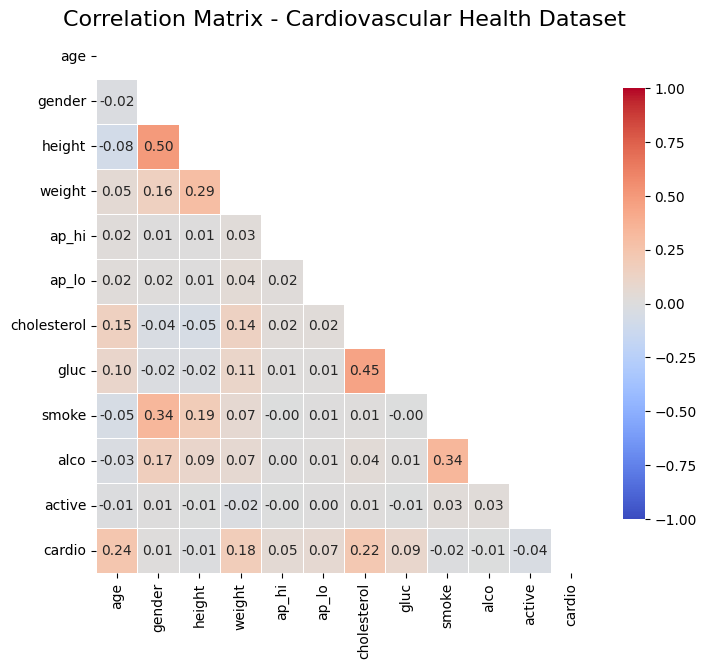

In [17]:
corr = raw_data.corr()
plt.figure(figsize=(8, 7))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,
            mask=mask, 
            annot=True,      # Show the numbers in the boxes
            fmt=".2f",       # Format numbers to 2 decimal places
            cmap='coolwarm', # Red for positive, Blue for negative
            vmax=1,          # Max value for color scale
            vmin=-1,         # Min value for color scale
            center=0,        # Center color scale at 0
            linewidths=.5,   # Add white lines between squares
            cbar_kws={"shrink": .8}) # Shrink the legend bar slightly

# 4. Add Title and Show
plt.title('Correlation Matrix - Cardiovascular Health Dataset', fontsize=16)
plt.yticks(rotation=0) # Ensure y-axis labels are horizontal
plt.show()

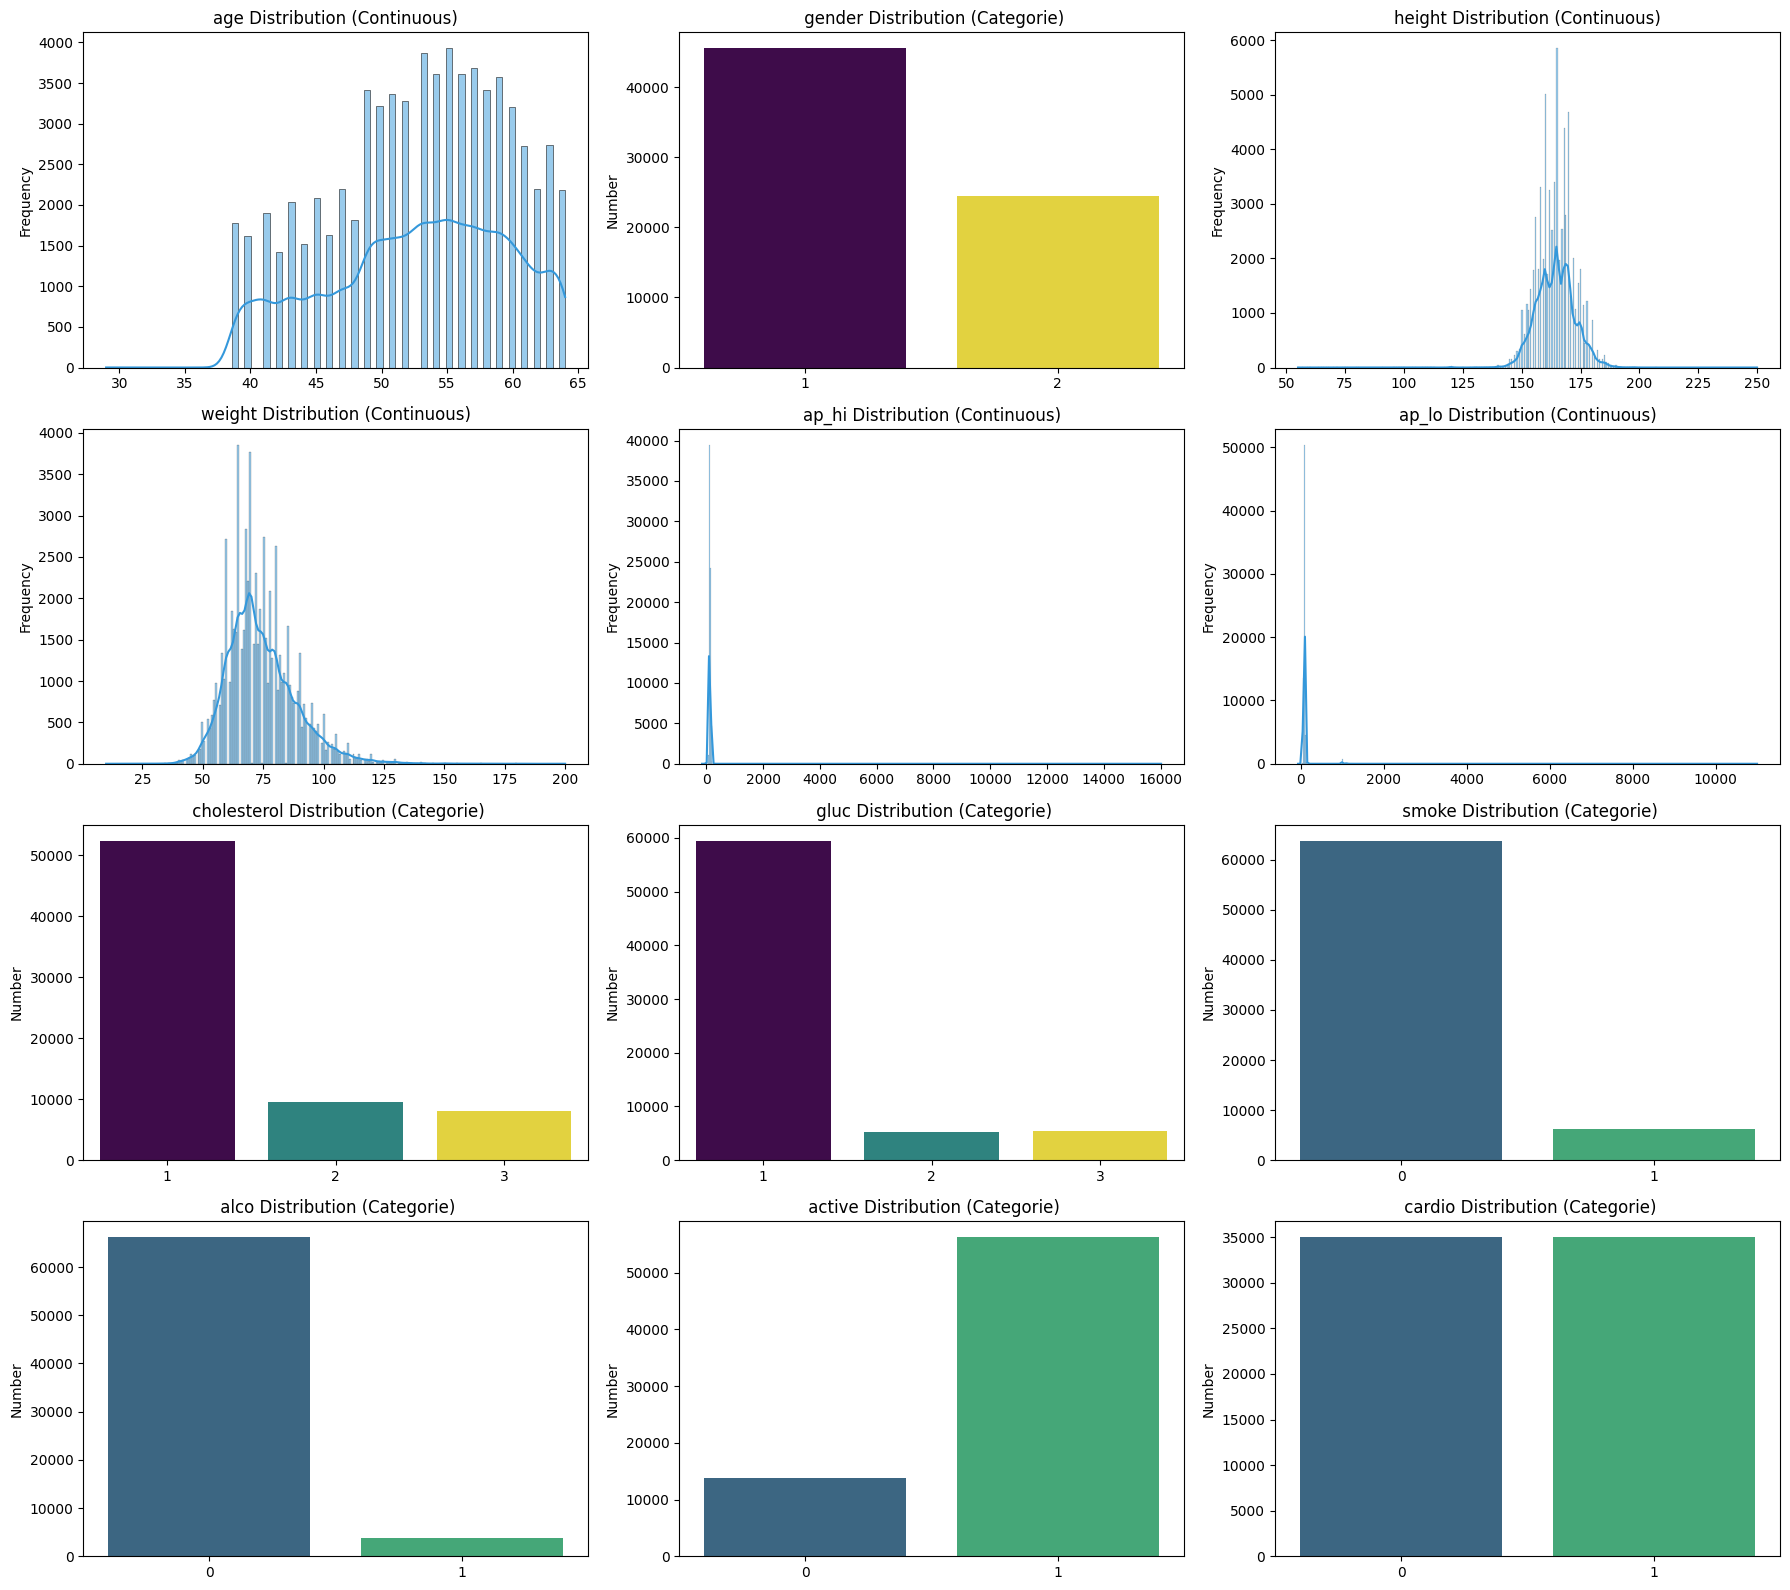

In [21]:
n_cols = 3  # Nombre de colonnes dans la grille
n_rows = (len(raw_data.columns) + n_cols - 1) // n_cols # Calcul automatique des lignes

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten() # Aplatir pour itérer facilement

# Boucle sur toutes les colonnes
for i, col in enumerate(raw_data.columns):
    # Logique : Si moins de 10 valeurs uniques => Variable Catégorielle (Barplot)
    # Sinon => Variable Continue (Histogramme + Courbe de densité)
    if raw_data[col].nunique() < 10:
        sns.countplot(data=raw_data, x=col, ax=axes[i], hue=col, palette='viridis', legend=False)
        axes[i].set_title(f' {col} Distribution (Categorie)')
        axes[i].set_ylabel('Number')
    else:
        sns.histplot(data=raw_data, x=col, kde=True, ax=axes[i], color='#3498db', edgecolor='black')
        axes[i].set_title(f'{col} Distribution (Continuous)')
        axes[i].set_ylabel('Frequency')
    
    axes[i].set_xlabel('') # Nettoyage visuel

# Supprimer les graphiques vides s'il y en a en trop dans la grille
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()